In [23]:
import pandas as pd
df = pd.read_csv('t20.csv')
X = df.iloc[:,[7,8,9,10,11,12,13]].values
y = df.iloc[:, 14].values
df.shape
#Features are CURRENT TOTAL RUNS, CURRENT WICKETS TAKEN, CURRENT OVER,
#RUNS IN LAST 5 OVERS, WICKETS IN LAST 5 OVERS, RUNS BY STRIKER, RUNS BY NON-STRIKERe

(180777, 15)

In [24]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

In [25]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=420)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.7,'colsample_bylevel': 0.9,'learning_rate': 0.1,
                'max_depth': 6, 'alpha': 10,'tree_method':'hist'}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,num_boost_round=300,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=118)

In [29]:
cv_results.head(100)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,145.010764,0.012321,145.010373,0.055960
1,130.956583,0.010995,130.956393,0.059216
2,118.361583,0.010053,118.362791,0.063389
3,107.029578,0.009654,107.033031,0.071158
4,96.831525,0.010594,96.835761,0.077620
...,...,...,...,...
95,20.687329,0.025653,20.819733,0.098403
96,20.672930,0.025638,20.805755,0.098321
97,20.670676,0.026022,20.803905,0.098362
98,20.655267,0.026797,20.789237,0.097420


In [30]:
print((cv_results["test-rmse-mean"]).tail(1))

299    20.176188
Name: test-rmse-mean, dtype: float64


In [43]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xg_reg

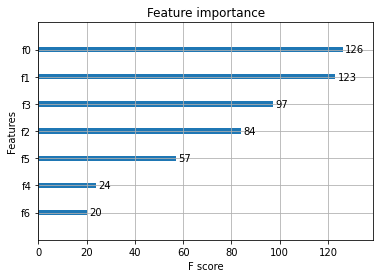

In [42]:
import matplotlib.pyplot as plt

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [78]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, colsample_bylevel = 1, learning_rate = 0.1, min_split_loss = 1, max_depth = 5, alpha = 0.5, reg_lambda = 1, n_estimators = 300, tree_method = 'approx')

In [79]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [80]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
score = xg_reg.score(X_test,y_test)*100
print("RMSE: %f" % (rmse))
print("R2:" , score)

RMSE: 20.239282
R2: 55.94412965154305
